In [16]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [17]:
df = yf.download('BTC-USD', start='2024-01-01', end='2025-01-25', interval='1d').get('Close')
df.head()

[*********************100%***********************]  1 of 1 completed

Ticker,BTC-USD
Date,
2024-01-01,44167.332031
2024-01-02,44957.968750
2024-01-03,42848.175781
2024-01-04,44179.921875
2024-01-05,44162.691406


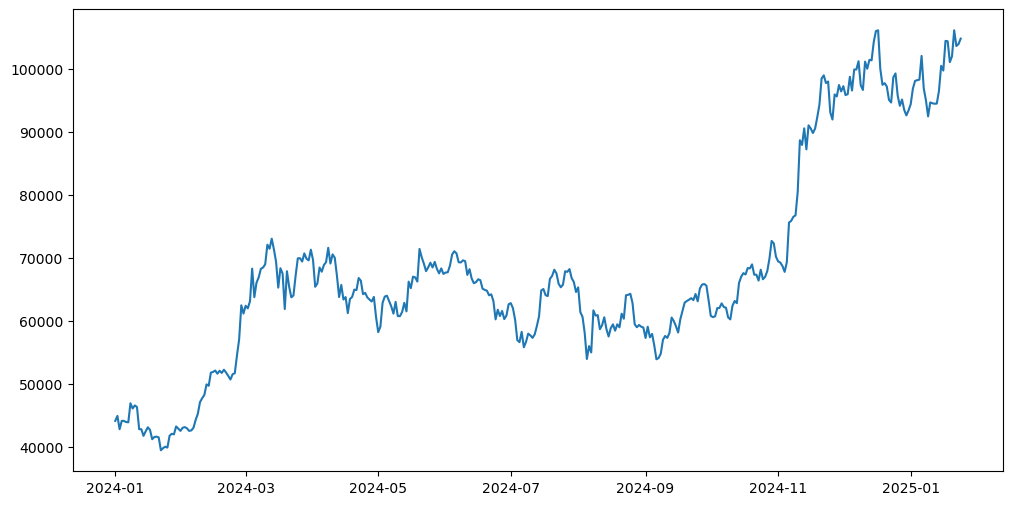

In [18]:
plt.figure(figsize=(12, 6))
plt.plot(df['BTC-USD'])


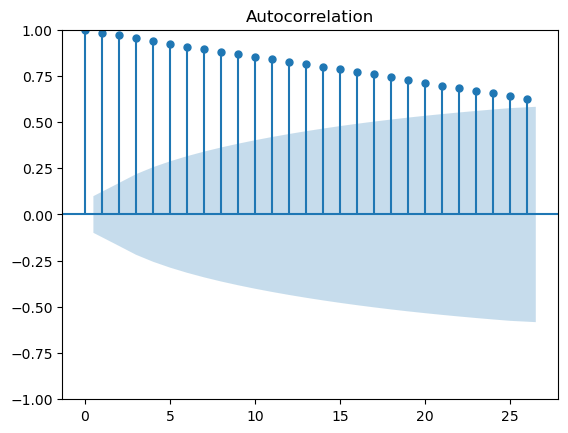

In [19]:
acf = plot_acf(df['BTC-USD'].dropna())

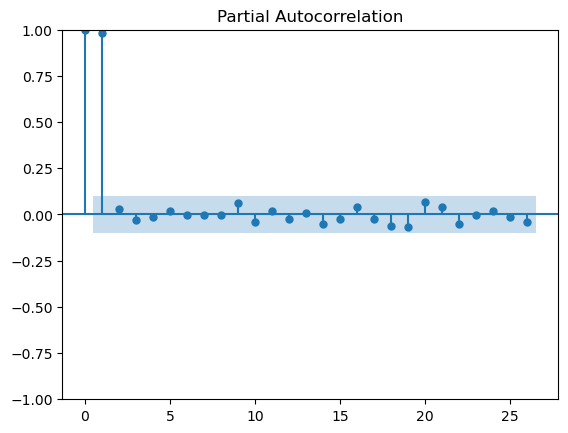

In [20]:
pacf= plot_pacf(df['BTC-USD'].dropna())

In [21]:
df['return'] = df['BTC-USD'].pct_change()

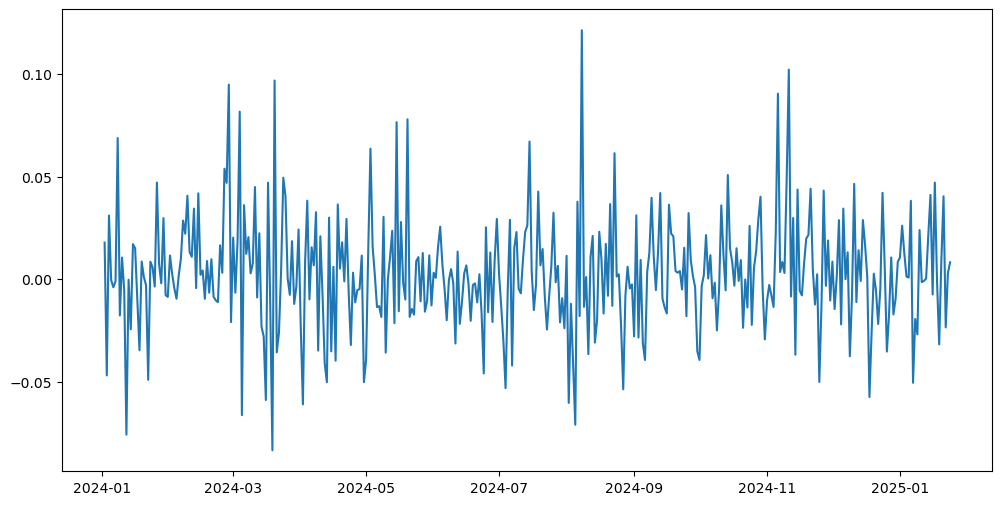

In [22]:
plt.figure(figsize=(12, 6))
plt.plot(df['return'])

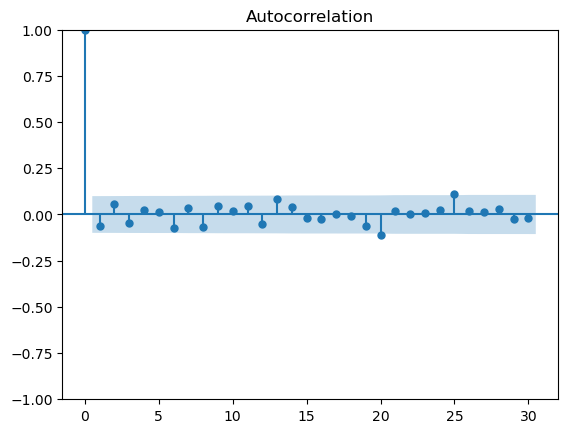

In [23]:
acf = plot_acf(df['return'].dropna(), lags=30)

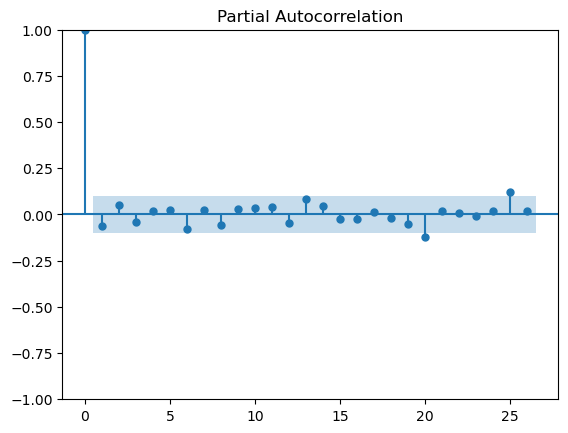

In [24]:
pacf= plot_pacf(df['return'].dropna())

In [25]:
#dicky fuller test FOR btc price
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['BTC-USD'])
print(result)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

(-0.5005761854112118, 0.8919040088004055, 0, 389, {'1%': -3.447272819026727, '5%': -2.868998737588248, '10%': -2.5707433189709294}, 6681.592964833412)
ADF Statistic: -0.500576
p-value: 0.891904


In [26]:
#dicky fuller test for return series
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['return'].dropna())
print(result)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

(-20.88800180355764, 0.0, 0, 388, {'1%': -3.4473167281607155, '5%': -2.869018036958473, '10%': -2.5707536074503134}, -1609.29491625748)
ADF Statistic: -20.888002
p-value: 0.000000
